In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('CustomerChurn.csv')

In [6]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.shape

(7043, 21)

In [8]:
data.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
data['Churn'].value_counts()/len(data)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Text(0.5, 1.02, 'Count of target variable per category')

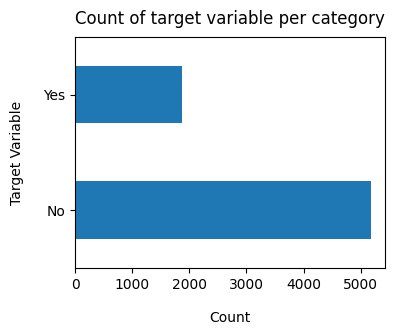

In [17]:
data['Churn'].value_counts().plot(kind='barh',figsize=(4,3))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of target variable per category",y=1.02)

In [18]:
data['Churn'].value_counts()  #data is highly imbalanced ratio=73.27
#so we analyse the data with other features while taking the target values separately to get some insights.

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [26]:
data.info(verbose=True) #more detailed summary of dataframe's structure and contents.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
# missing=pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
# plt.figure(figsize=(16,5))
# ax=sns.pointplot('index',0,data=missing)
# plt.xticks(rotation=90,fontsize=7)
# # plt.title("Percentage of missing values")?
# plt.ylabel("Percentage")
# plt.show()

In [29]:
data=data.copy()

In [31]:
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [32]:
data.loc[data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [33]:
data.dropna(how='any',inplace=True)

In [34]:
print(data['tenure'].max()) #Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

72


In [35]:
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)] #group the tenure in 12 months
data['tenure_group']=pd.cut(data.tenure,range(1,80,12),right=False,labels=labels)

In [36]:
data['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [37]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


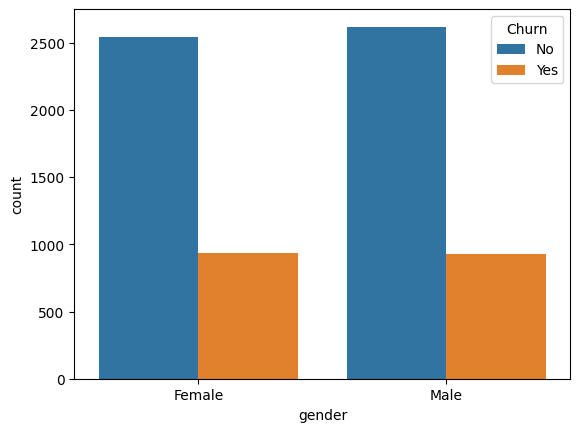

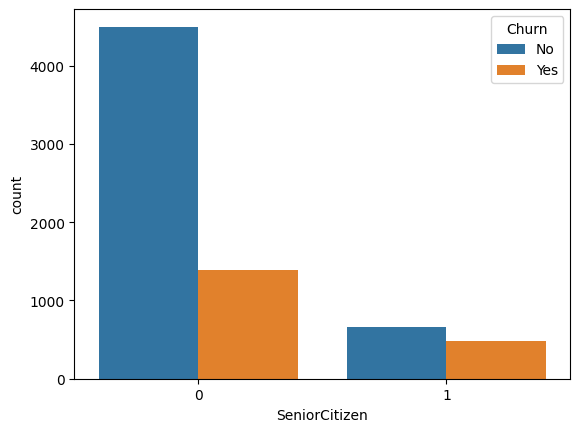

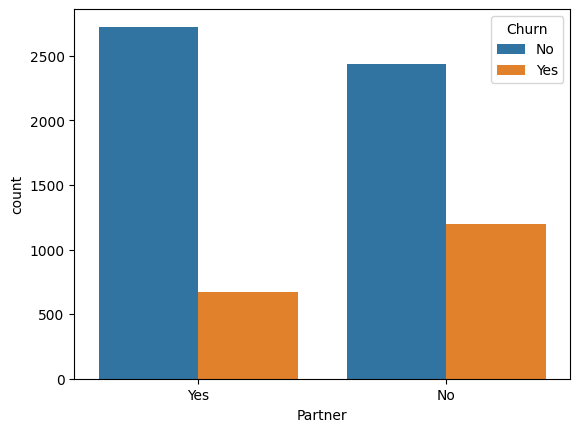

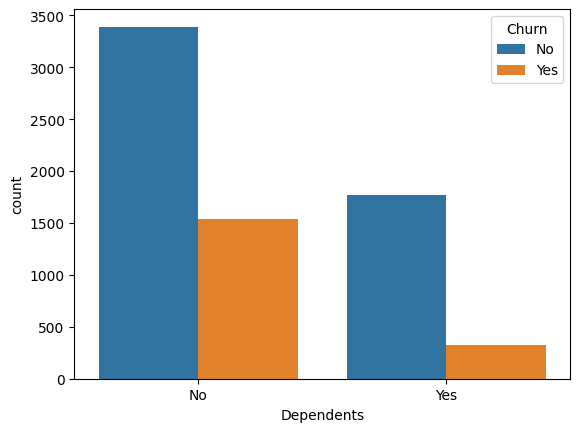

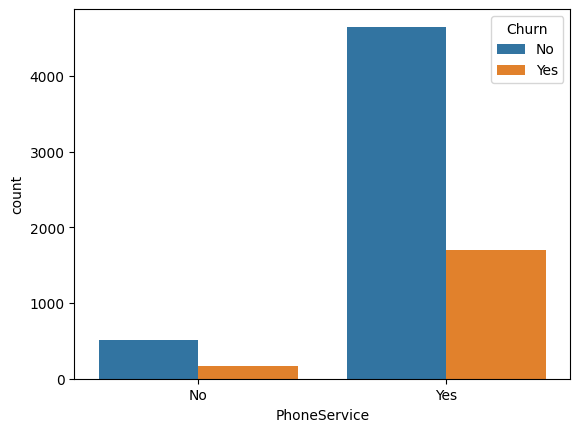

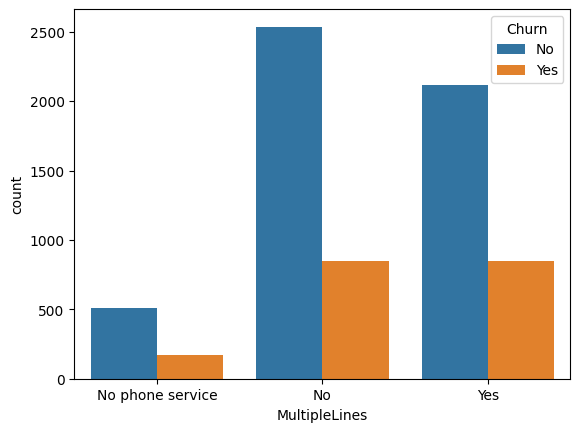

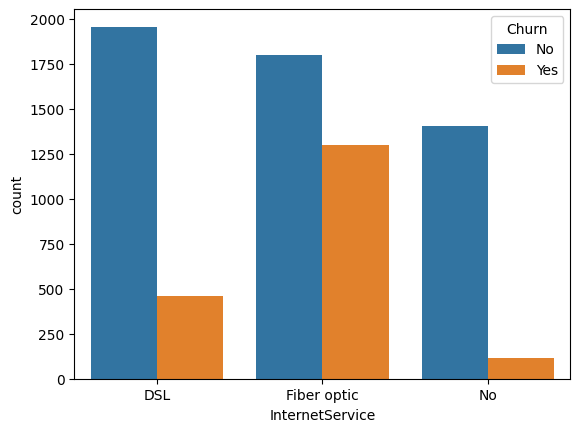

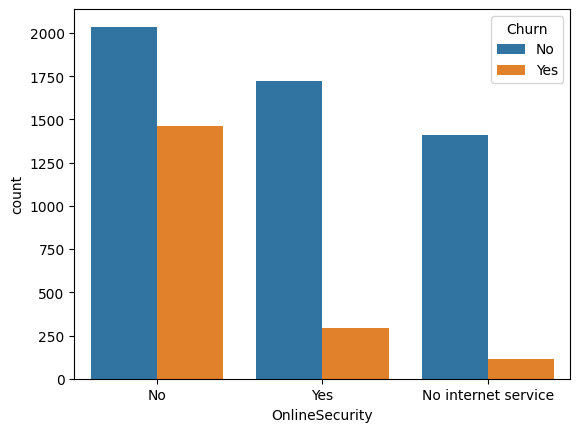

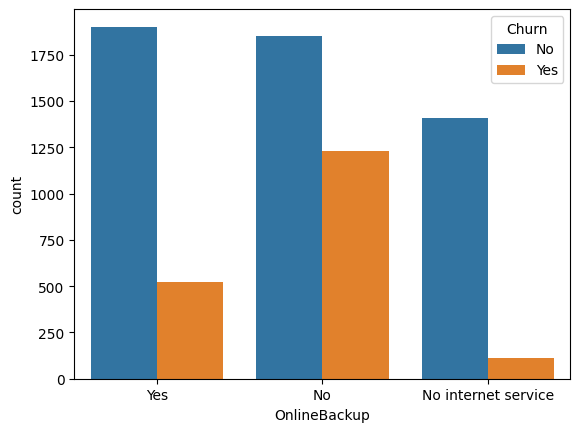

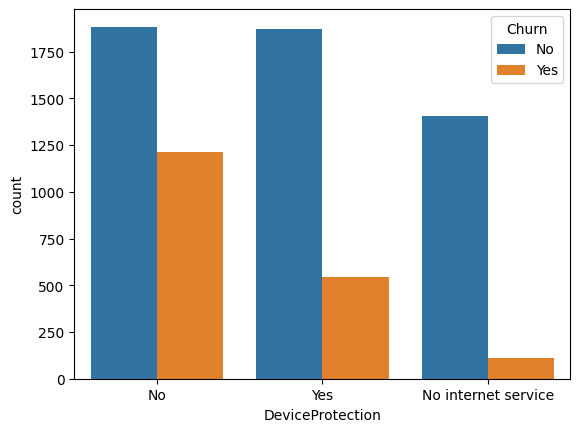

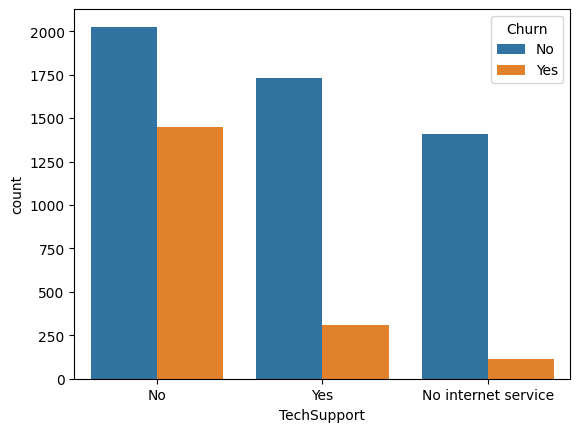

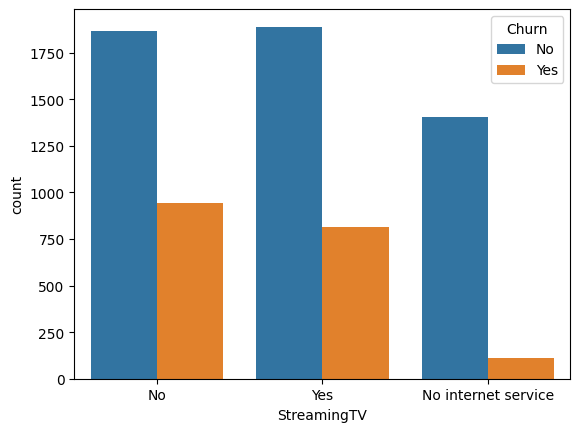

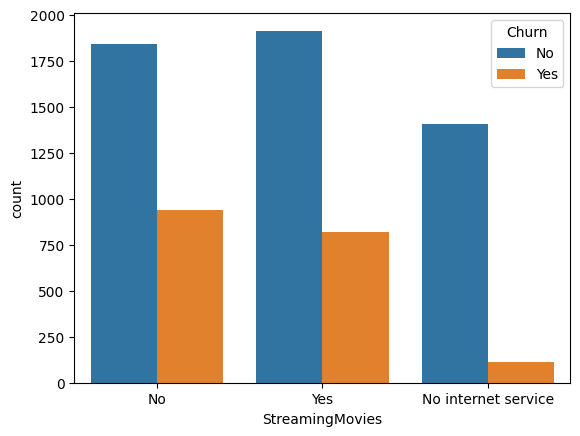

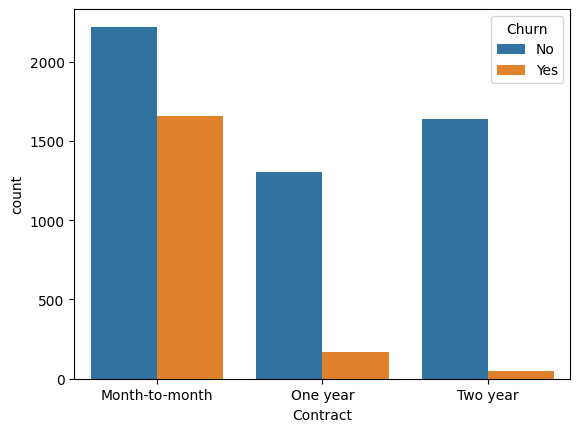

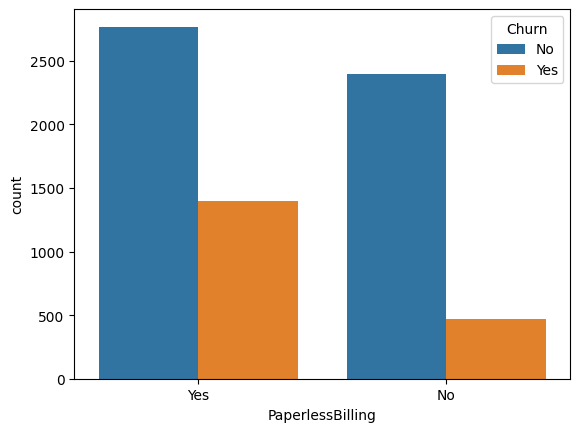

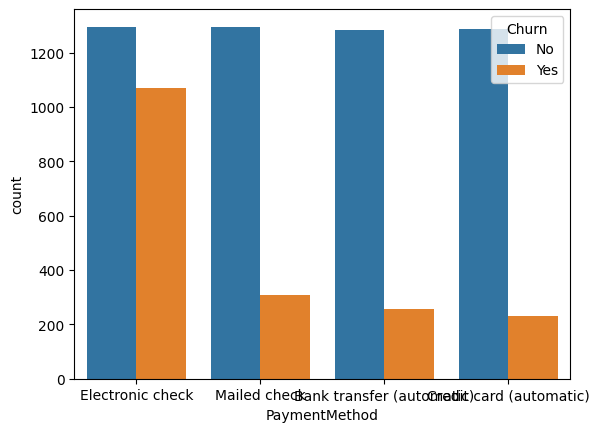

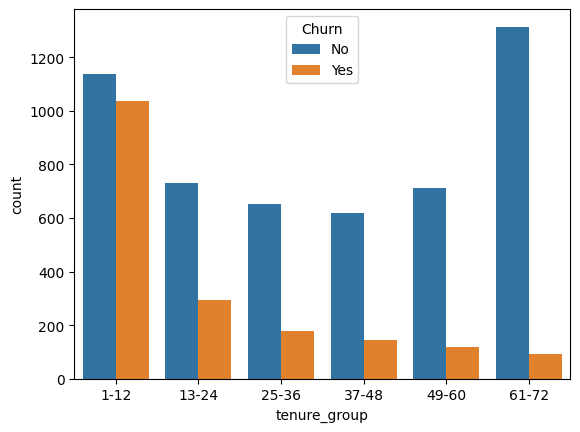

In [39]:
#plot distribution of individual predictors by churn
#univariate analysis
for i,predictor in enumerate (data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data,x=predictor,hue='Churn')

In [40]:
# Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
data['Churn']=np.where(data.Churn=='Yes',1,0)

In [41]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [42]:
# Convert all the categorical variables into dummy variables
data_dummies=pd.get_dummies(data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


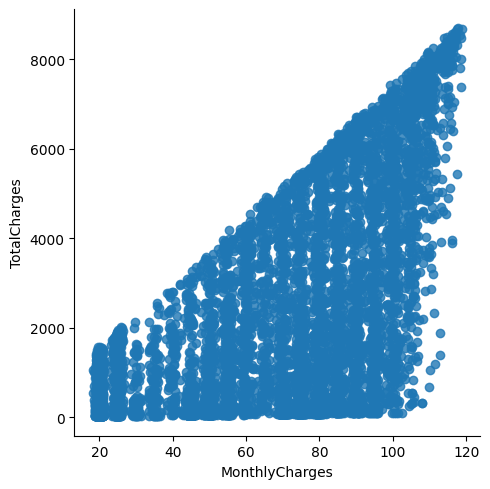

In [44]:
# Relationship between Monthly Charges and Total Charges
sns.lmplot(data=data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_21772\877378236.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn']==0)],color="Red",shade=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_21772\877378236.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn']==1)],ax=Mth,color="Blue",shade=True)


Text(0.5, 1.0, 'Monthly Charges by Churn')

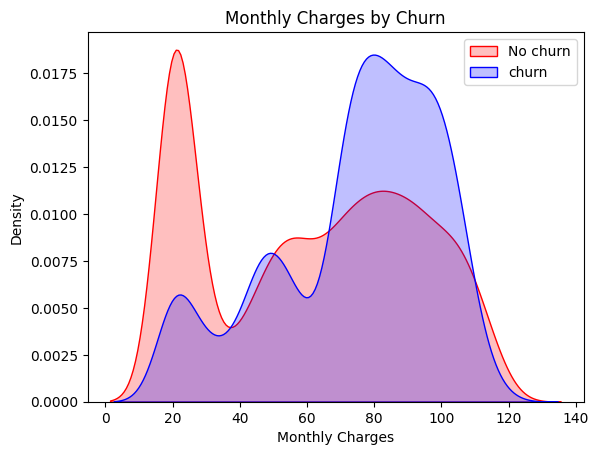

In [46]:
Mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn']==0)],color="Red",shade=True)
Mth=sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies['Churn']==1)],ax=Mth,color="Blue",shade=True)
Mth.legend(["No churn","churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn') #churn is high when monthly charges are high

C:\Users\dell\AppData\Local\Temp\ipykernel_21772\1600859868.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn']==0)],color='Red',shade=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_21772\1600859868.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot=sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn']==1)],color='Blue',ax=tot,shade=True)


Text(0.5, 1.0, 'Total charges by churn')

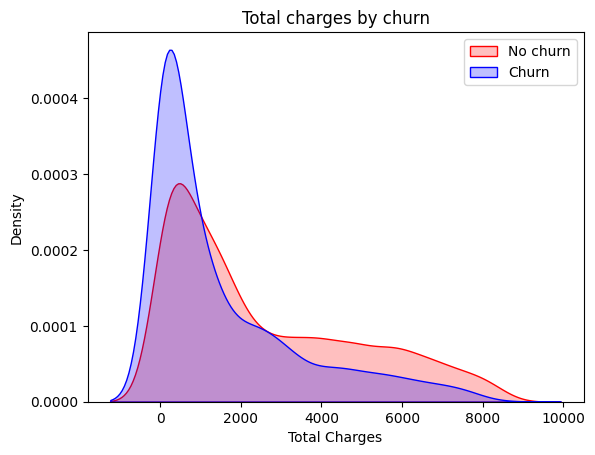

In [47]:
tot=sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn']==0)],color='Red',shade=True)
tot=sns.kdeplot(data_dummies.TotalCharges[(data_dummies['Churn']==1)],color='Blue',ax=tot,shade=True)
tot.legend(['No churn','Churn'],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title("Total charges by churn")
    

<Axes: >

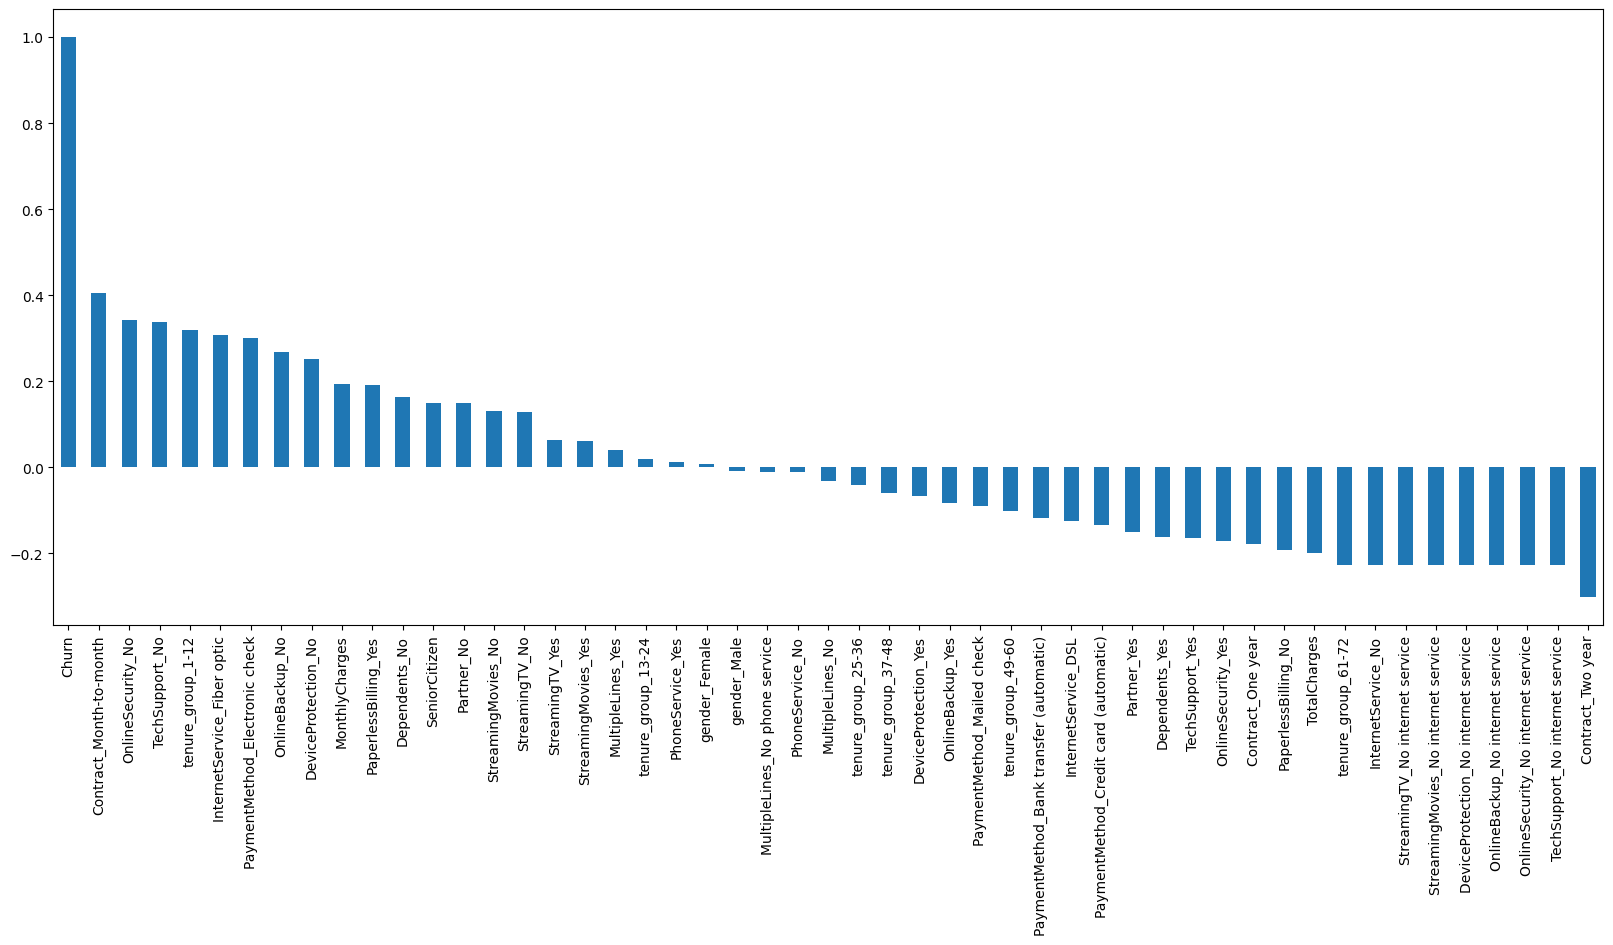

In [49]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
# **Derived Insight: **

# HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

# LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

# Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

<Axes: >

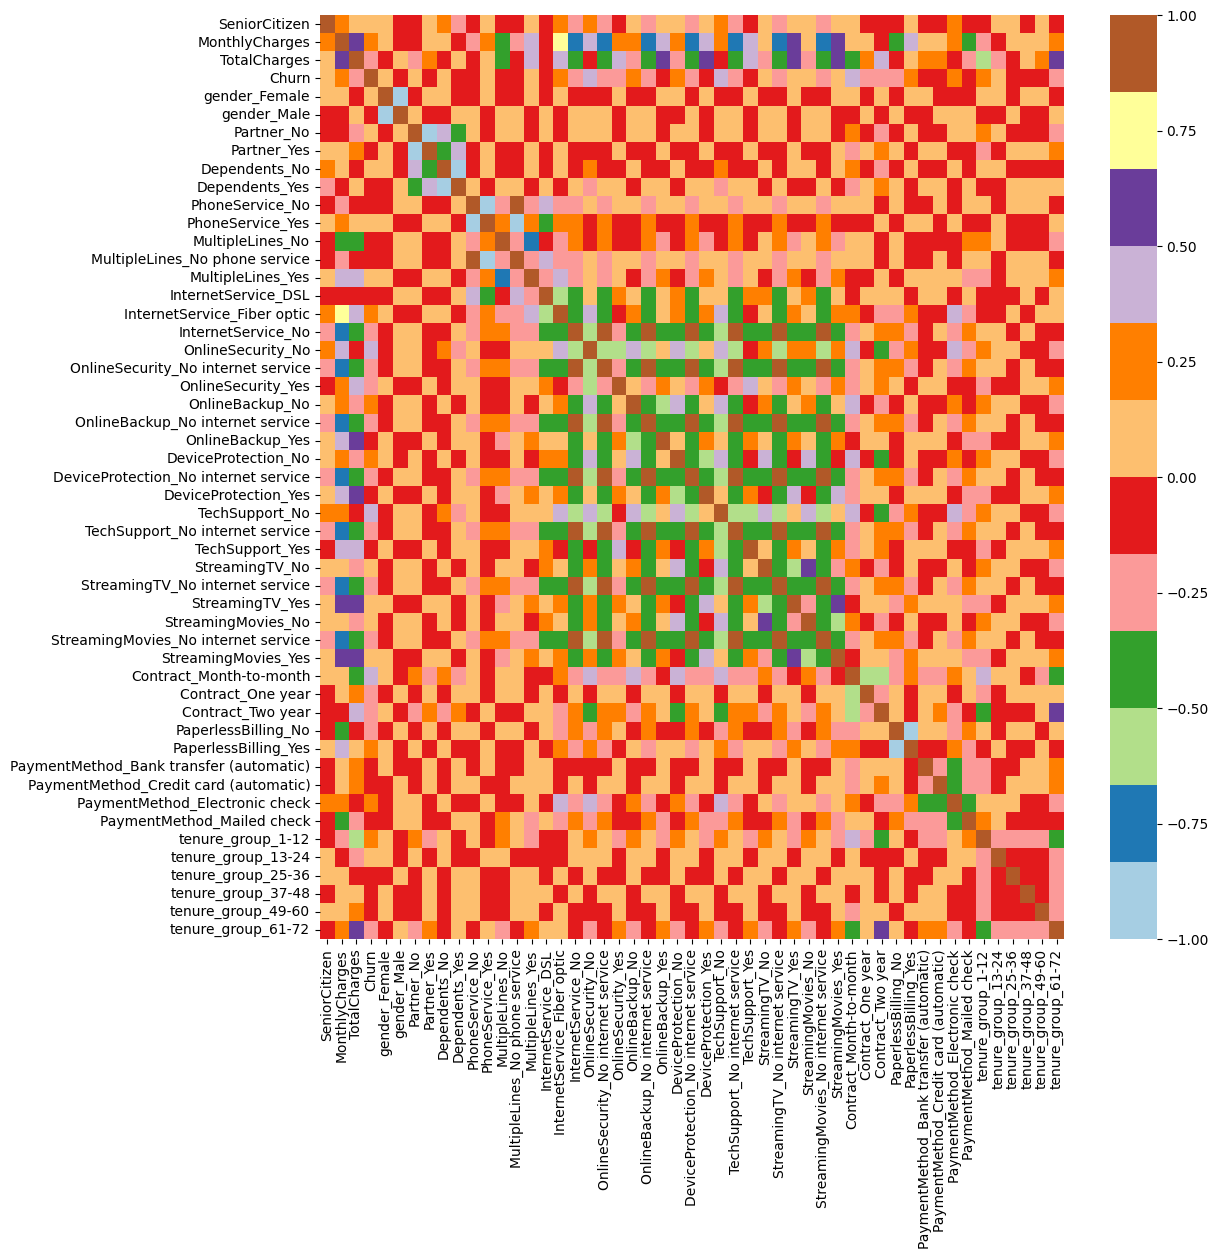

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(),cmap="Paired")

In [51]:
new_df1_target0=data.loc[data["Churn"]==0]
new_df1_target1=data.loc[data["Churn"]==1]

In [52]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

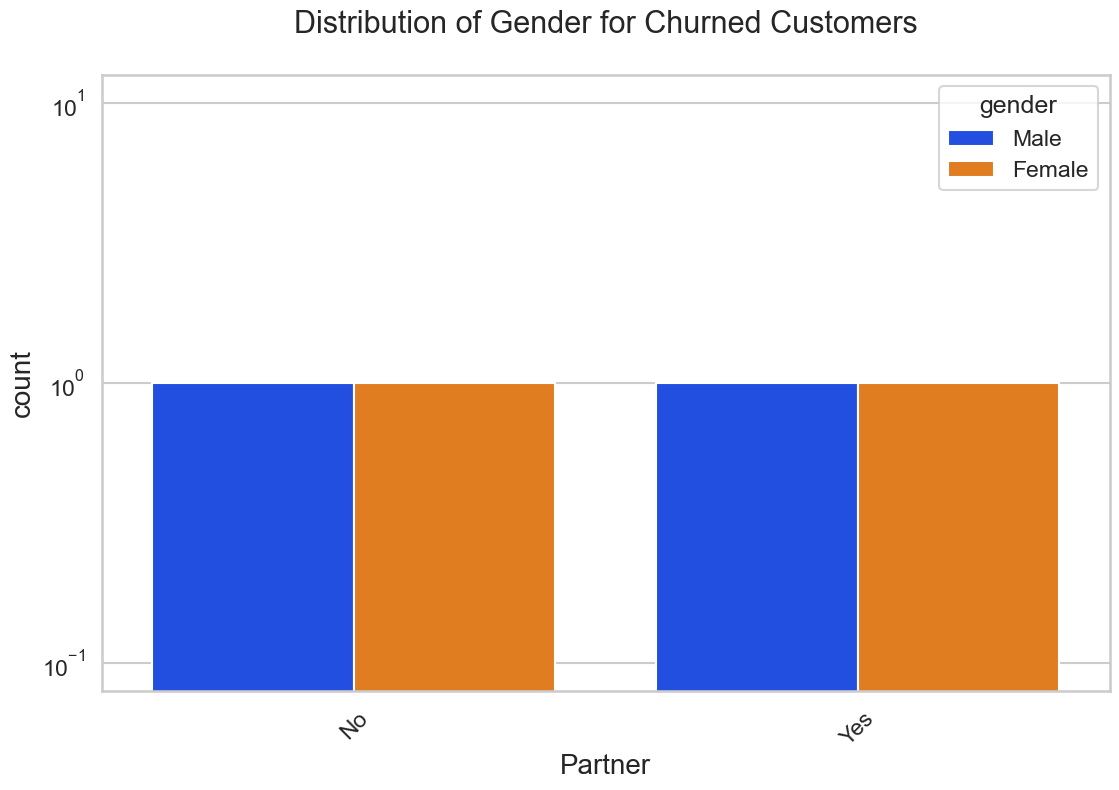

In [53]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

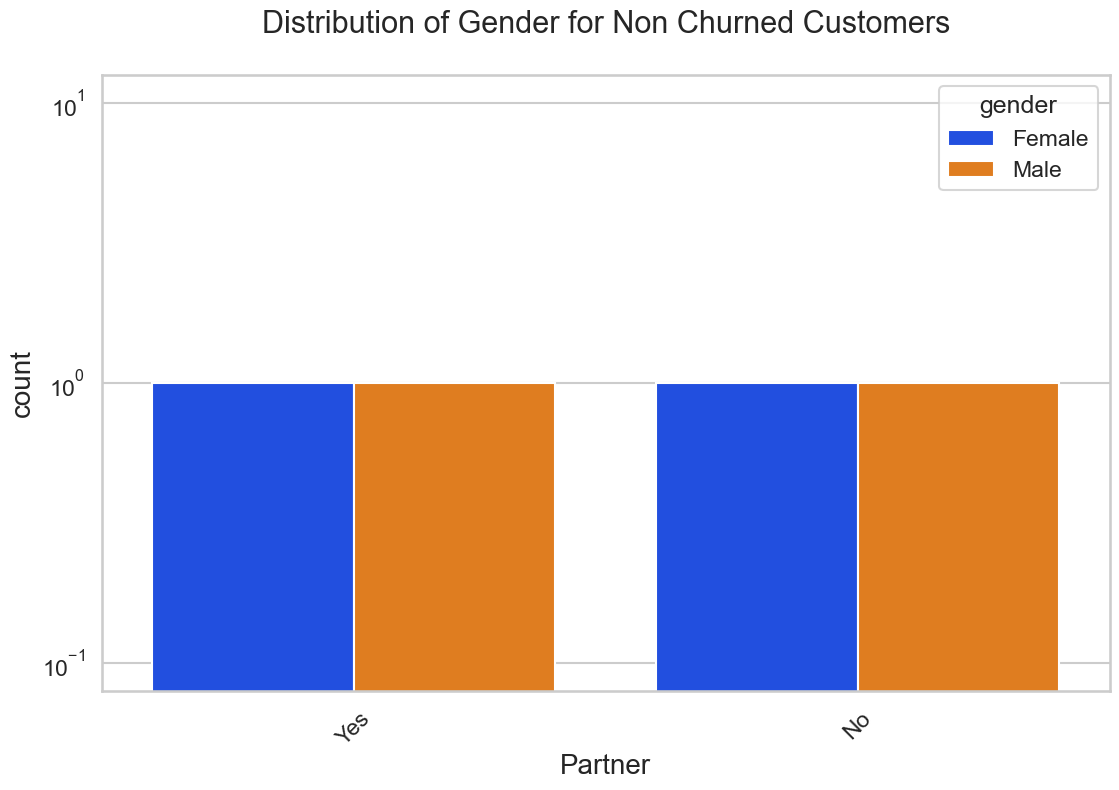

In [54]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


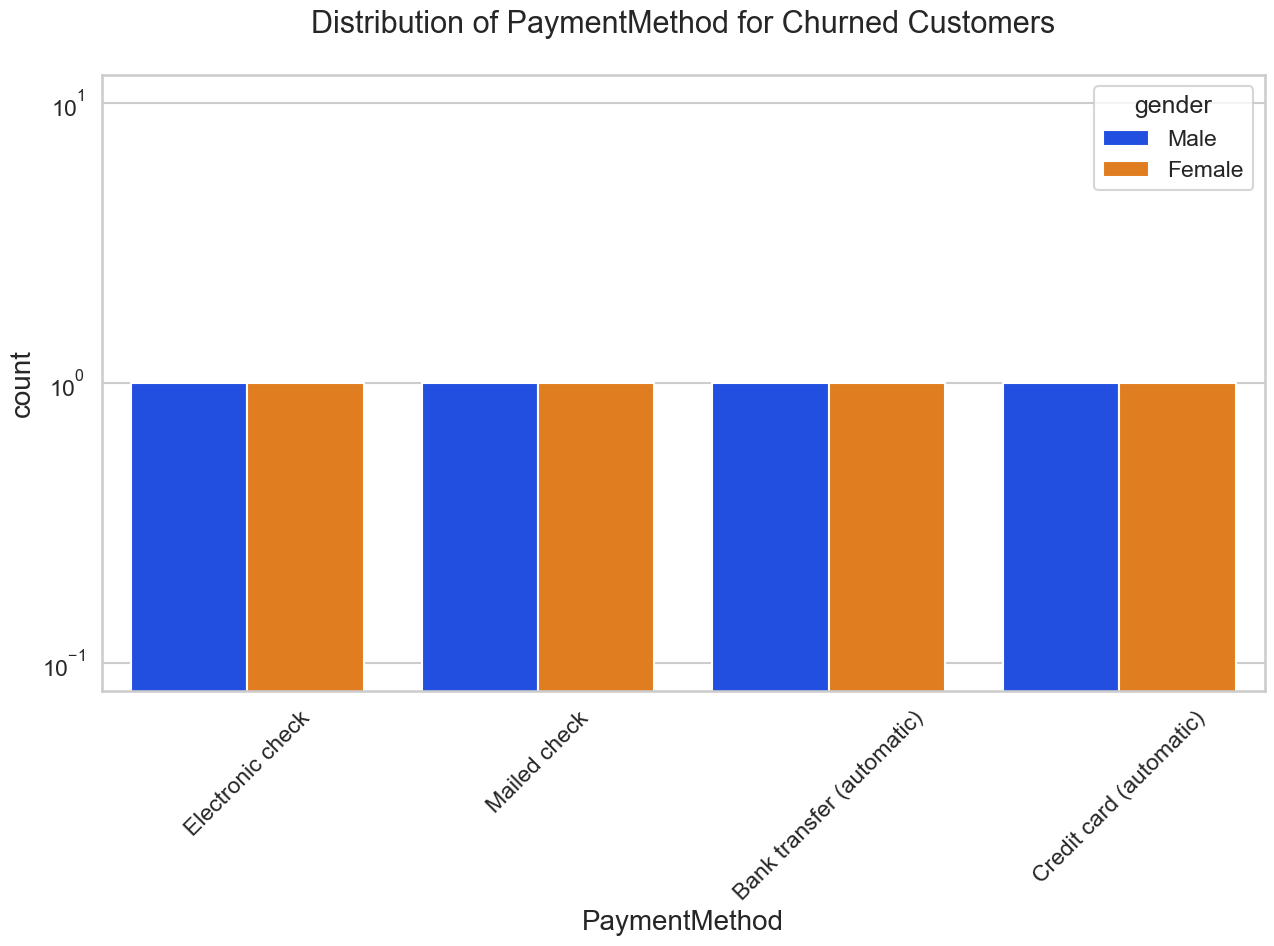

In [55]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


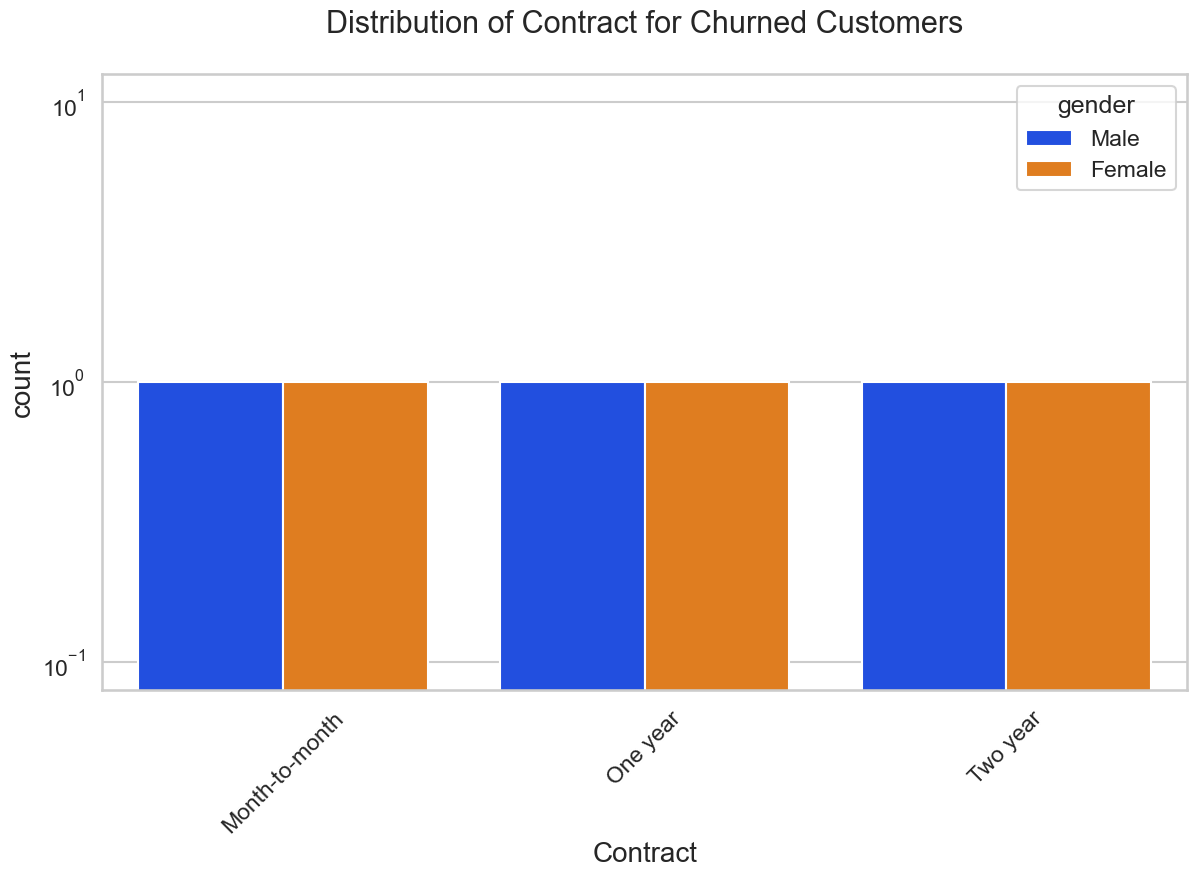

In [56]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


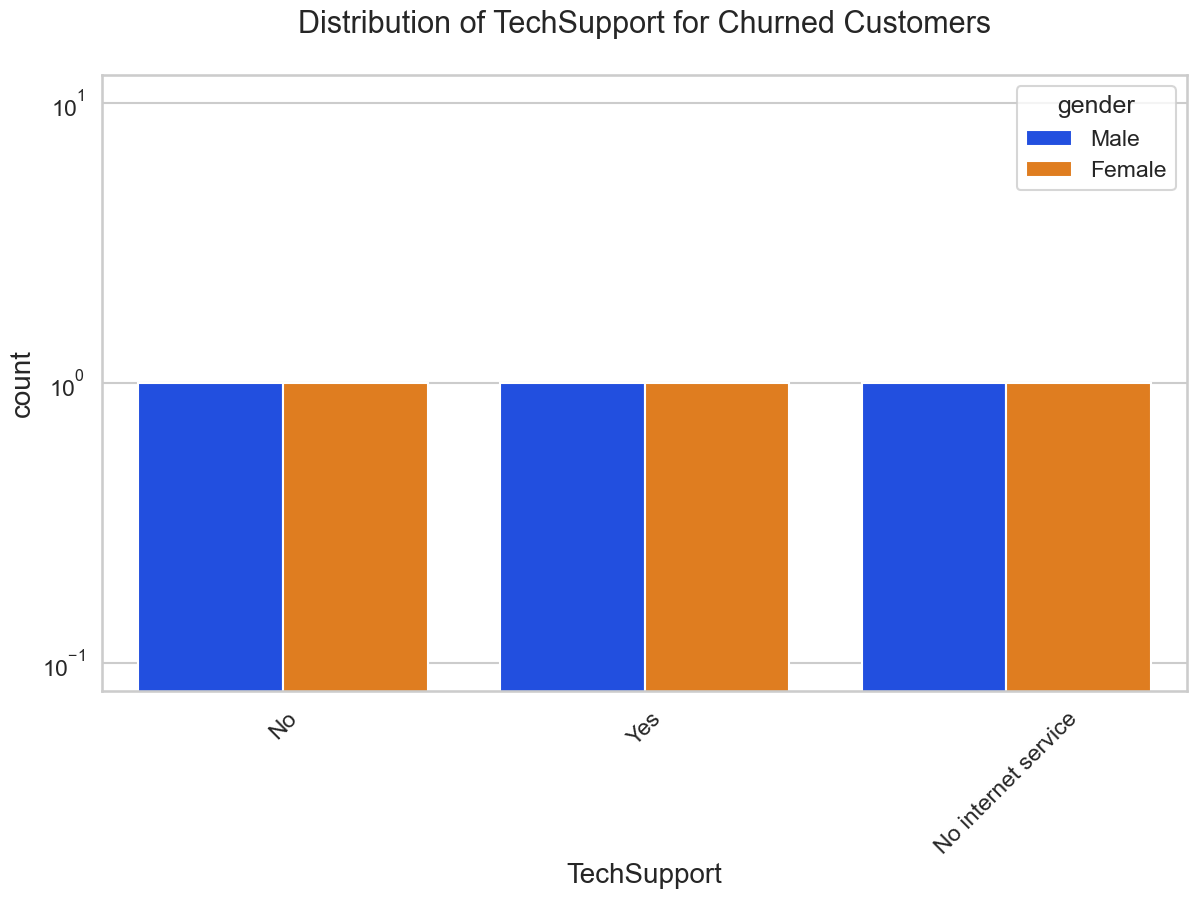

In [57]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


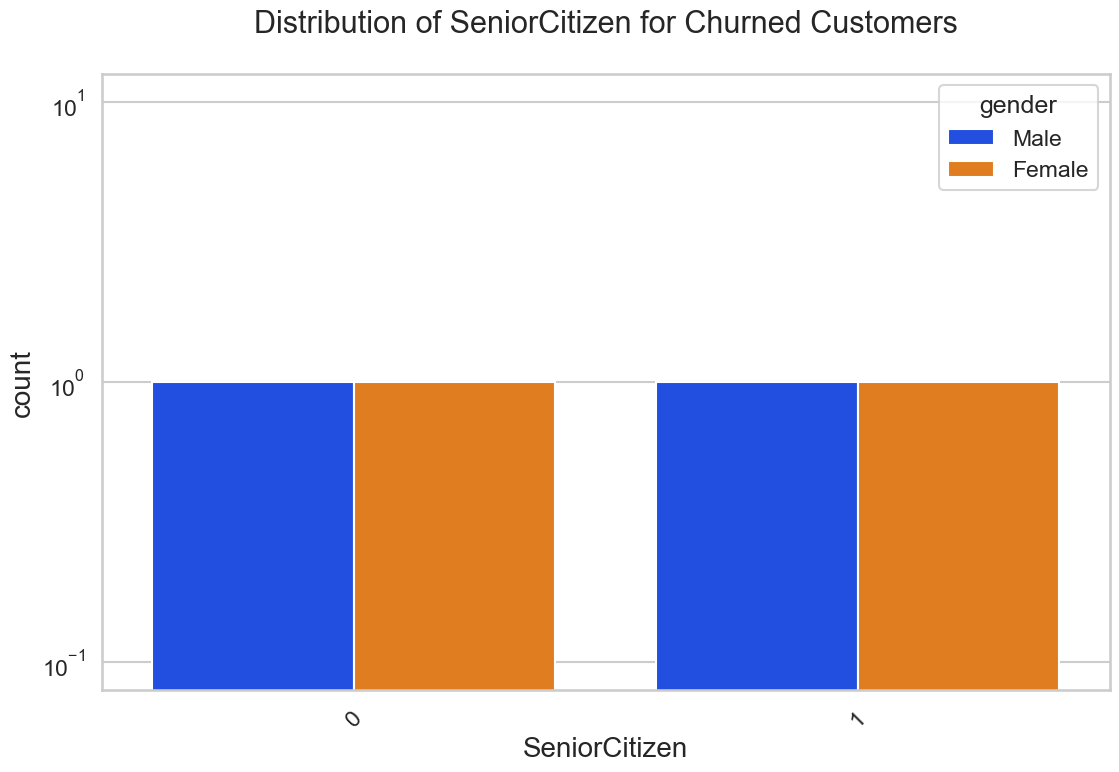

In [58]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')



In [59]:
data_dummies.to_csv('tel_churn.csv')

In [ ]:
# These are some of the quick insights from this exercise:

# Electronic check medium are the highest churners
# Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
# No Online security, No Tech Support category are high churners
# Non senior Citizens are high churners